## Digit Classification with SVHN Dataset using Convolutional Neural Network (CNN)

In [1]:
import scipy.io as io
import numpy as np
import keras

trX = io.loadmat('Datasets/svhn_train.mat')['X']
trY = io.loadmat('Datasets/svhn_train.mat')['y']
tsX = io.loadmat('Datasets/svhn_test.mat')['X']
tsY = io.loadmat('Datasets/svhn_test.mat')['y']

In [2]:
# normalizing training set
x_train = trX / 255 

# converting training labels to one hot vector encoding
y_train = np.zeros((trY.shape[0], 10), dtype = 'uint8')

for i in range(trY.shape[0]):
    y_train[i][trY[i]] = 1

# normalizing test set
x_test = tsX / 255

# converting test labels to one hot vector encoding
y_test = np.zeros((tsY.shape[0], 10), dtype = 'uint8')

for i in range(tsY.shape[0]):
    y_test[i][tsY[i]] = 1

### CNN Model for classification

In [3]:
# making the cnn model
from keras import layers

# architecture of the model
inputs = keras.Input(shape = (32, 32, 3))
layer = layers.Conv2D(filters = 64, kernel_size = (5,5), activation = "relu", padding = "same")(inputs)
layer = layers.MaxPooling2D(pool_size = (2,2), strides = (2,2))(layer)
layer = layers.Conv2D(filters = 64, kernel_size = (5,5), activation = "relu", padding = "same")(layer)
layer = layers.MaxPooling2D(pool_size = (2,2), strides = (2,2))(layer)
layer = layers.Conv2D(filters = 128, kernel_size = (5,5), activation = "relu", padding = "same")(layer)
layer = layers.Flatten()(layer)
layer = layers.Dense(3072, activation = "relu")(layer)
layer = layers.Dense(2048, activation = "relu")(layer)
outputs = layers.Dense(10, activation = "softmax")(layer)

model = keras.Model(inputs = inputs, outputs = outputs)

# compiling model using SGD optimizer
model.compile(optimizer = keras.optimizers.SGD(learning_rate = 0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [4]:
# training the model

history = model.fit(x_train, y_train, batch_size = 160, epochs = 20, validation_data=(x_test, y_test))

Epoch 1/20
458/458 [==============================] - 324s 707ms/step - loss: 2.2476 - accuracy: 0.1842 - val_loss: 2.2137 - val_accuracy: 0.1959
Epoch 2/20
458/458 [==============================] - 328s 717ms/step - loss: 2.2190 - accuracy: 0.1939 - val_loss: 2.1481 - val_accuracy: 0.2183
Epoch 3/20
458/458 [==============================] - 328s 715ms/step - loss: 2.0899 - accuracy: 0.2654 - val_loss: 1.6707 - val_accuracy: 0.4657
Epoch 4/20
458/458 [==============================] - 330s 720ms/step - loss: 1.5104 - accuracy: 0.5228 - val_loss: 1.1099 - val_accuracy: 0.6832
Epoch 5/20
458/458 [==============================] - 322s 703ms/step - loss: 0.9044 - accuracy: 0.7335 - val_loss: 0.9013 - val_accuracy: 0.7394
Epoch 6/20
458/458 [==============================] - 327s 715ms/step - loss: 0.6844 - accuracy: 0.8015 - val_loss: 0.6323 - val_accuracy: 0.8210
Epoch 7/20
458/458 [==============================] - 338s 738ms/step - loss: 0.5704 - accuracy: 0.8343 - val_loss: 0.5974 -

In [8]:
# evaluating accuracy of model on test set

test_scores = model.evaluate(x_test, y_test)
print('\nTest Accuracy: ', test_scores[1] * 100)

814/814 [==============================] - 34s 42ms/step - loss: 0.4292 - accuracy: 0.8805

Test Accuracy:  88.04548382759094


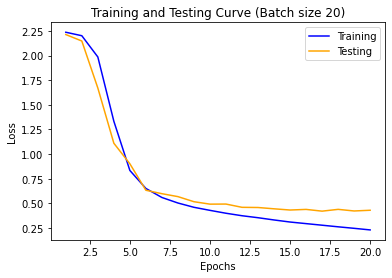

In [9]:
# plotting the training and the test curve

import matplotlib.pyplot as plt

# array of the number of epochs
epochs = np.arange(1, 21, dtype="uint8")

# array of training loss
loss = np.array(history.history['loss'])

# array of testing/validation loss
val_loss = np.array(history.history['val_loss'])

# plotting the curves
plt.plot(epochs, loss, color = "blue", label = "Training")
plt.plot(epochs, val_loss, color = "orange", label = "Testing")
plt.title('Training and Testing Curve (Batch size 20)')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()